In [1]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [2]:
X = iris["data"][:, (0, 1)]  # sepal length, sepal width
y = (iris["target"] == 0).astype(np.int)  # 1 if Iris-setosa, else 0

In [3]:
log_reg = LogisticRegression(solver="liblinear", C=10**10)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
x0, x1 = np.meshgrid(
        np.linspace(4.5, 6.25, 500).reshape(1, -1),
        np.linspace(2, 4.5, 400).reshape(1, -1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

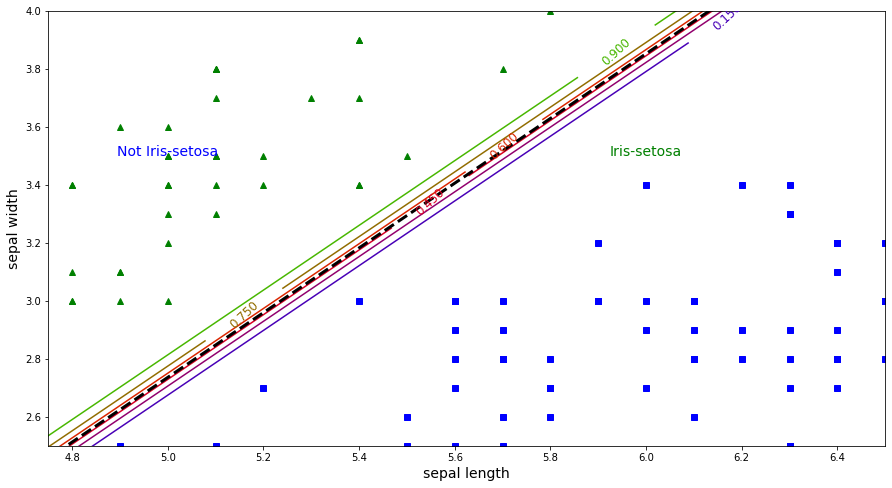

[[-31.5951823   28.30153016]]


In [14]:
plt.figure(figsize=(15, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(5, 3.5, "Not Iris-setosa", fontsize=14, color="b", ha="center")
plt.text(6, 3.5, "Iris-setosa", fontsize=14, color="g", ha="center")
plt.xlabel("sepal length", fontsize=14)
plt.ylabel("sepal width", fontsize=14)
plt.axis([4.75, 6.5, 2.5, 4])
plt.show()
print(log_reg.coef_)